In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data files/Bank.csv")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [31]:
x=data.iloc[:,:7].values
y=data.iloc[:,7].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
knncl=KNeighborsClassifier(n_neighbors=5)
knncl.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred=knncl.predict(x_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[6978,  347],
       [ 489,  424]])

In [36]:
accuracy_score(y_test,y_pred)

0.8985190580237922

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7325
           1       0.55      0.46      0.50       913

    accuracy                           0.90      8238
   macro avg       0.74      0.71      0.72      8238
weighted avg       0.89      0.90      0.89      8238



In [38]:
xtr,xts,ytr,yts=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [39]:
K=range(1,21)
Error=[]

for k in K:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(xtr,ytr)
  ypr=model.predict(xts)
  Error.append(1-accuracy_score(yts,ypr))

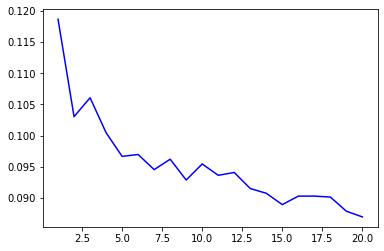

In [40]:
plt.plot(K,Error,"b-")
plt.show()

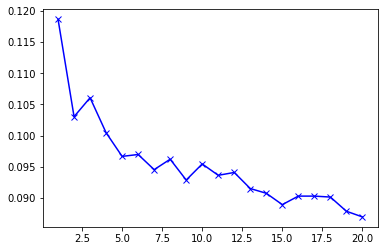

In [41]:
plt.plot(K,Error,"bx-")
plt.show()

In [42]:
params={"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}
model=KNeighborsClassifier()
cval=KFold(n_splits=10)

In [43]:
gsearch=GridSearchCV(model,params,cv=cval)

In [44]:
results=gsearch.fit(x_train,y_train)

In [45]:
results.best_params_

{'n_neighbors': 9}

In [47]:
K=range(1,21)
Error=[]

for k in K:
  model = KNeighborsClassifier(n_neighbors=k)
cvals=-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")

  Error.append(np.sqrt(cvals).mean())

IndentationError: ignored